Welcome to 
---
**Data analysis with Python I**

EPIC I
---
**Outline**

1. Introduction
2. Creating functions 
3. Reading and writing text/binary files
4. Working with data tables
  *   Basic statistics  
  *   Plots with matplotlib 
  *   Regressions and curve fitting


---

Dataset: https://archive.ics.uci.edu/ml/datasets/wine 

#1.Introduction
**1. Introduction** 
---
Check which packages you have already installed 
---
1.1. Display a list of installed package names and version numbers

In [ ]:
pip list

1.2. Check specific installed packages

a. numpy (Numerical python) https://numpy.org/doc/stable/user/absolute_beginners.html

b. pandas https://pandas.pydata.org/docs/user_guide/index.html#user-guide

c. matplotlib  https://matplotlib.org/stable/index.html

In [ ]:
pip show numpy

In [ ]:
pip show pandas

In [ ]:
pip show matplotlib



---
Use packages
---

Access to a package or to the code in another module by importing it. 

1.3. Import and use packages

In [ ]:
import numpy as np
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [ ]:
a1D = np.array([0, 1, 2, 3, 4])
a2D = np.array([[1, 2], [3, 4]])
a3D = np.array([[[1, 2], [3, 4]],
                [[5, 6], [7, 8]]])
print(a1D) 
print(a2D[0])
print(a3D)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#2.Creating functions
**2. Creating functions** 
---
2.1. Create a funtion to introduce info in a **data frame**
---


In [ ]:

fechas = pd.date_range("20211018", periods=2)
df = pd.DataFrame( np.concatenate((a2D, a2D), axis=1), index=fechas, columns=['E1', 'E2', 'E3','E4' ])
df


,E1,E2,E3,E4
2021-10-18,1,2,1,2
2021-10-19,3,4,3,4


In [ ]:
# poner datos medidos de temperatura en una tabla
def put_temperature(periodos, datos, columnas):
    fecha = pd.date_range("20211018", periods=periodos)
    df2 = pd.DataFrame(datos, index=fecha, columns = columnas)
    return df2

Use your function

In [ ]:
temperaturas = np.random.randint(15,22, (5,4))
put_temperature(5,temperaturas, list('1234'))

,1,2,3,4
2021-10-18,21,15,19,21
2021-10-19,21,20,15,18
2021-10-20,15,17,18,16
2021-10-21,19,20,20,21
2021-10-22,16,15,18,19


In [ ]:
datos_Octubre = put_temperature(5,np.random.randint(15,22, (5,4)), ['M1', 'M2', 'M3', 'M4'])

#3.Reading and writing files

***3. Reading and writing text and binary files***
---
Write in text files
---
*open()* : Function. No module is required to be imported for this function.
1. File in the same directory as the python program file or full address of the file (r"file_name")
2. Acess mode: **r**,  **r+**, **w**, **w+**, **a**, **x**

Example: object = open("misEjercicios.txt", "r")

Note: The r is placed before filename to prevent the characters in filename string to be treated as special character. 


Two ways to write in a file:

*write()* : Inserts a single string.

*writelines()* : Insert a list of string elements.

How to specify number of decimals and string format -->
https://docs.python.org/3/library/string.html#format-specification-mini-language



---

3.1. Write a message in a txt file.

In [ ]:
file1 = open("hola.txt","a")
file1.write("Hola Mundo \nMe llamo Lupe")
file1.close()

3.2. Create an array and store it in a txt file.

In [ ]:
file2 = open("datosTemperatura.txt","x")
for row in temperaturas:
    np.savetxt(file2, row, fmt='%d', delimiter=' ', newline='\n')
file2.close()

NameError: ignored

3.3. Save a data frame in a txt file 

In [ ]:
file3 = open("datosOctubre.txt","a")
file3.writelines(datos_octubre.columns + ' ')
file3.writelines("\n")
np.savetxt(file3, datos_octubre.values, fmt='%d')
file3.close()

Read text files
---

There are three ways to read data from a text file.

***read()*** 

object.*read()*: reads the entire file

object.*read(n)*: reads *n* bytes

***readline()*** : reads a line of the file and returns in form of a string.

***readlines()***: reads all the lines and return them as each line a string element in a list.


---
3.4. Read a text file



In [ ]:
file4 = open("hola.txt", "r")
print (file4.read())
file4.close()

Hola Mundo 
Me llamo Lupe


In [ ]:
file4 = open("hola.txt", "r")
print (file4.readline())
file4.close()

Hola Mundo 



In [ ]:
file4 = open("hola.txt", "r")
print (file4.readlines())
file4.close()

['Hola Mundo \n', 'Me llamo Lupe']


3.5. Read a text file using a function.

***split():*** splits the variable when space is encountered

In [ ]:
def readDatosTemperatura(filename):
    #open file 
    file8 = open(filename, "r")
    data_read = file8.readlines()
    file8.close()
    
    #split data
    all_data = []
    for lineas in data_read:
        datos = lineas.split() 
        all_data.append(datos)
        
    ##convert data string to float 
    data = [] 
    for i in range(1,6): 
        datos_float = np.asarray(all_data[i], dtype=np.float64)
        data.append(datos_float)
    
    return  all_data,  data  

Using exception handling and list comprehension. 

***with  ...  as ***: using this method any files opened will be closed automatically after one is done.

https://docs.python.org/3/reference/compound_stmts.html

https://realpython.com/list-comprehension-python/

In [ ]:
def readDatosTemperatura(filename):
    #Files opened will be closed automatically
    with open(filename)as file:
        all_data = []
        for lineas in file.readlines():
            all_data.append([value for value in lineas.split()])
            
    ##convert data string to float 
    data = []
    for i in range(1,6): 
        data.append(np.asarray(all_data[i], dtype=np.float64))       
    
    return   all_data,  data  

Read and Write text files
---


---
Warning: ***write()*** overwrite the contents of file entirely.

In [ ]:
#CAUTION overwrite!! 
file5 = open("hola.txt", "w")
file5.write(" Estoy en el EPIC I, hola mundo"+"\n" +"Lunes de Clase")
file5.close()

In [ ]:
#Insert text in the same file
file6 = open("hola.txt", "a")
file6.write("\n Sigo en el EPIC I")
file6.close()

***seek() ***: use to change the position of the file (cursor) 
 

In [ ]:
#Insert text in a specific position 
file7 = open("hola.txt", "r+")
file7.seek(5) 
file7.write("--Aqui voy a insertar texto--")
print(file7.read())
file7.close()

In [ ]:
##How to seek and write in specific points
##1.Write a text
file7_1 = open("hola.txt", "r+")
for i in range(5,20,5):
  file7_1.write("Numero:"+str(i)+" ")
file7_1.close()

In [ ]:
##Read the file 
with open("hola.txt", "r") as file7:
  print (file7.read())

Numero:5 Numero:10 Numero:15 xto--


In [ ]:
file7_1 = open("hola.txt", "r+")
for i in range(7,30,9):
  file7_1.seek(i)  #find a character and write there
  file7_1.write(str(i-1)+" ")
file7_1.close()

In [ ]:
##Read the file 
with open("hola.txt", "r") as file7:
  print (file7.read())

Numero:6 Numero:15 Numero24  xto--


Write and Read binary files
---



---
Use mode = "wb" (write-binary) or "rb" (read-binary)

3.6. Write a message in a binary file.

In [ ]:
#Write a text in a binary file
with open("texto.bin", "wb") as file8:
    file8.write(b"Hola Mundo. Aqui estamos")

In [ ]:
#Read a text the binary file
with open("texto.bin","rb") as file9:
    print(file9.read())

3.7. Write an array in a binary file

In [ ]:
with open("temperaturas.bin", "wb") as file10:
    file10.write(temperaturas.tobytes())

3.7. Read an array from a binary file

In [ ]:
with open("temperaturas.bin","rb") as file11:
    number=list(file11.read())
    print (number)

In [ ]:
#Read as an array
with open("temperaturas.bin","rb") as f:
        numpy_data = np.fromfile(f,np.int32)
print(numpy_data)

3.8. Use *numpy* to read/write an array to a file 

***tofile***: send an array to a file

***fromfile ***: construct an array from the data in the file

datatype object : int8, int32, int64


In [ ]:
temperaturas.tofile("temperaturas.bin")  # write a file
print(np.fromfile("temperaturas.bin", dtype=np.int32)) # read from file 

Write and Read csv files
---



---
3.9. Use *pandas* to read/write an array to a file 

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#csv-text-files

In [ ]:
#Write a data frame in a csv file
datos_octubre.to_csv('temperaturas.csv')

In [ ]:
#read a data frame from csv file
df_datos_octubre = pd.read_csv('temperaturas.csv')

Handling the Current Working Directory
---

***os.path*** : function of the operating system module to manipulate paths. 

---

Current Working Directory (CWD): directory where your are operating. 
*   Whenever you can call the files only by their name. 
*   Folder where the Python script is running.

https://docs.python.org/3/library/os.html


3.10. Get the location of your Current Working Directory (CWD)

In [ ]:
import os
parent_dir= os.getcwd()

3.11. Open a file using the path      


In [ ]:
name_file = "temperaturas.csv"     
path_temp = os.path.join(parent_dir, name_file)
pd.read_csv(path_temp)

#4.Working with data tables
**4. Working with data tables** 
---
4.0. Playing with arrays, list, dictionaries
---
Array vs list 

https://favtutor.com/blogs/python-array-vs-list


In [ ]:
#Create a array
unos = np.ones(3)

In [ ]:
# Creating a list  
ejemplo_list = [25,"temperaturas",['dia1','dia2']] 
print(sample_list)

In [ ]:
# Creating a dictionary
ejemplo_dict = {
  "Temperature": ["Centigrades", "Fahrenheit"],
  "Experiment": "1",
  "year": 2021
}
print(ejemplo_dict["Temperature"])

['Centigrades', 'Fahrenheit']


---
4.1. Basic statistics
---
https://numpy.org/doc/stable/reference/routines.statistics.html

https://docs.python.org/3/tutorial/datastructures.html

Use numpy: 

***mean***: Compute the arithmetic mean along the specified axis.

***median***: Compute the median along the specified axis

***var***: Compute the variance along the specified axis.

***std***: Compute the standard deviation along the specified axis.

***amin*** Return the minimum of an array or minimum along an axis.

***amax***: Return the maximum of an array or maximum along an axis.

Example: Open a file and get basic statics of a dataset


In [ ]:
#path of the file
import os
import numpy as np
parent_dir = os.getcwd()
name_file = "wine.csv"     
path_wine = os.path.join(parent_dir, name_file)

##define lists
wine = []
alcohol =[]
phenols = []
flavonoids = []
all_data_wine = []

## open the file, read the lines, and split the columns into lists
file_wine = open(path_wine)
data = file_wine.read().splitlines()
for i in range(1, len(data)):
    data_split = data[i].split(',')
    wine.append(float(data_split[0]))
    alcohol.append(float(data_split[1]))
    phenols.append(float(data_split[6]))
    flavonoids.append(float(data_split[7]))
  
    all_data_wine.append(np.asarray(data_split, dtype=np.float64))
    
file_wine.close()

In [ ]:
#Using exception handling and list comprehension
import os
import numpy as np
path_wine = os.path.join(os.getcwd(), "wine.csv" )

all_data_wine = []
with open(path_wine) as file_wine:
    data = file_wine.read().splitlines()
    header_wine = data[0].split(',')
for i in range(1,len(data)):
    all_data_wine.append(np.asarray(data[i].split(','), dtype=np.float64))

In [ ]:
#Mean/Median/Variance/STD/ of arrays
print('alcohol:', round(np.mean(alcohol),2), 'std:', round(np.std(alcohol),2))
print('phenols :',round(np.mean(phenols),2), 'std:', round(np.std(phenols),2))
print('flavonoids:', round(np.mean(flavonoids),2), 'std:',round(np.std(flavonoids),2))
print('median and var of alcohol:', np.median(alcohol),'var:', np.var(alcohol))

print('Characterists:', header_wine[6:8])
print('Mean of all:  ', np.round(np.mean(all_data_wine, axis=0)[6:8],2))
print('Std of all:  ', np.round(np.std(all_data_wine, axis=0)[6:8],2))
#print('Mean of rows:', np.mean(all_data_wine, axis=1)[0:6])

alcohol: 13.0 std: 0.81
phenols : 2.3 std: 0.62
flavonoids: 2.03 std: 1.0
median and var of alcohol: 13.05 var: 0.6553597304633255
Characterists: ['Phenols', 'Flavanoids']
Mean of all:   [2.3  2.03]
Std of all:   [0.62 1.  ]


 
---
4.2. Ploting with matplotlib
---
https://matplotlib.org/stable/tutorials/introductory/sample_plots.html

***matplotlib.pyplot*** collection of functions. We can create a figure, a 
plotting area, plot points, plot lines, and decorate.

https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

Example: Plot two arrays in a figure

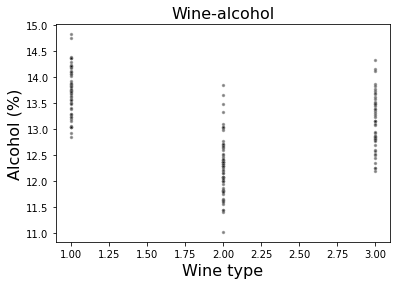

In [ ]:
import matplotlib.pyplot as plt

plt.plot(wine, alcohol, '.', markersize=5, mfc='black', mec='gray', alpha=0.5 )

plt.title('Wine-alcohol', fontsize=16)
plt.xlabel('Wine type', fontsize=16)
plt.ylabel('Alcohol (%)', fontsize=16)
plt.show()

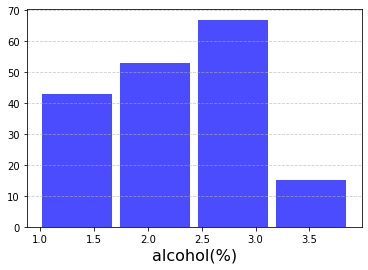

In [ ]:
#histogram plots
plt.hist(x=phenols, bins=4, color='b', alpha=0.7, rwidth=0.9)
plt.grid(axis='y', linestyle='--', alpha=0.65)
plt.xlabel('alcohol(%)', fontsize=16)
plt.show()

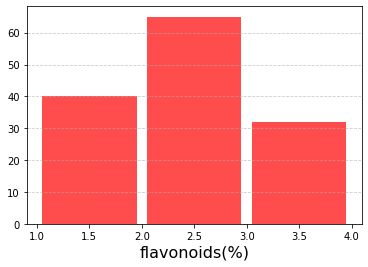

In [ ]:
#Make own bins histogram and save my figure
name_MyGraph = 'mi_histograma.png'
path_mygraph = os.path.join(parent_dir, name_MyGraph)

plt.hist(x=flavonoids, bins=[1,2,3,4], color='r', alpha=0.7, rwidth=0.9)
plt.grid(axis='y', ls='--', alpha=0.65)
plt.xlabel('flavonoids(%)', fontsize=16)
plt.savefig(path_mygraph)  ##save my figure
plt.show()


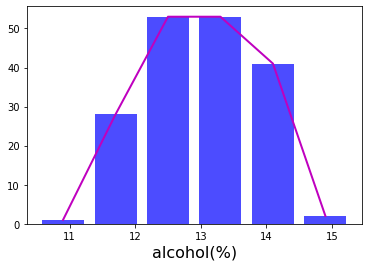

In [ ]:
#histogram plots
mybins = np.arange(10.5,15.5, 0.8)
shift = 0.4
n_out, bins_out, patches = plt.hist(x=alcohol, bins=mybins, color='b', alpha=0.7, rwidth=0.8)
plt.plot(mybins[1:len(mybins)]-shift, n_out, lw =2, c ='m')
plt.xlabel('alcohol(%)', fontsize=16)
plt.show()

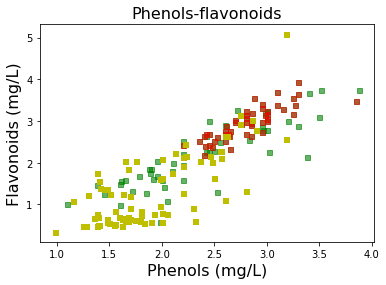

In [ ]:
#Scatter plot

plt.plot(phenols, flavonoids, 's', markersize=5, c='g', alpha=0.6)
plt.plot(phenols[0:50], flavonoids[0:50], 's', markersize=5, c='r', alpha=0.5)
plt.plot(phenols[100:178], flavonoids[100:178], 's', markersize=5, c='y', alpha=1)

plt.title('Phenols-flavonoids', fontsize=16)
plt.xlabel('Phenols (mg/L)', fontsize=16)
plt.ylabel('Flavonoids (mg/L)', fontsize=16)

plt.show()


---
4.3. Regressions and curve fitting
---

Simple linear regression using ***numpy*** 

***numpy.polyfit*** Least squares polynomial fit.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

***scipy.stats.pearsonr***. Pearson correlation coefficient and p-value for testing non-correlation.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html


Example: Fit a dataset by $y$ = $a_0$$x$+ $a_1$

In [ ]:
# calculate Pearson's r correlation coeficient
from scipy import stats
print(stats.pearsonr(phenols, flavonoids))

(0.8645635000951147, 1.755838952586498e-54)


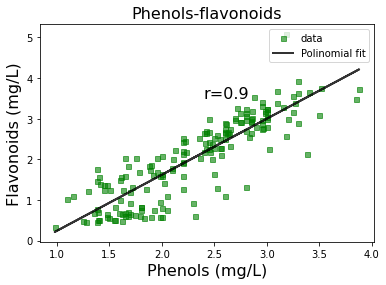

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

#Using a first orden polinomial function 
# y = a_0*x + a_1
a_0, a_1 = np.polyfit(phenols, flavonoids, 1)
r, p = stats.pearsonr(flavonoids, a_0*np.array(phenols)+ a_1)

plt.plot(phenols, flavonoids, 's', ms=5, c='g', alpha=0.6, label = 'data')
plt.plot(phenols, a_0*np.array(phenols)+ a_1, ls='-', lw='2', c='k', alpha=0.8, label ='Polinomial fit')

plt.title('Phenols-flavonoids', fontsize=16)
plt.xlabel('Phenols (mg/L)', fontsize=16)
plt.ylabel('Flavonoids (mg/L)', fontsize=16)
plt.text(2.4, 3.5, 'r=%.1f'%r, fontsize=16)
plt.legend(loc = 'upper right')
plt.show()

Example: Fit a dataset by  $y$  =  $a_0$$x^2$ +  $a_1x$ +$a_2$

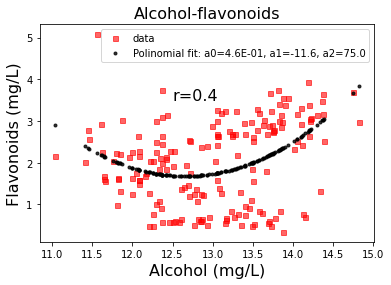

In [ ]:
#Using a second orden polinomial function 
# y = a_0*x + a_1*x^2 + a_2
a_0, a_1, a_2 = np.polyfit(alcohol, flavonoids, 2)
r, p = stats.pearsonr(flavonoids, a_0*((np.array(alcohol))**2)+ a_1*np.array(alcohol)+a_2)


plt.plot(alcohol, flavonoids, 's', ms=5, c='r', alpha=0.6, label = 'data')
plt.plot(alcohol, a_0*((np.array(alcohol))**2)+ a_1*np.array(alcohol)+a_2, '.',
         lw='2', c='k', alpha=0.8, label ='Polinomial fit: a0=%.1E, a1=%.1f, a2=%.1f' % tuple([a_0, a_1, a_2]))
plt.text(12.5, 3.5, 'r=%.1f'%r, fontsize=16)

plt.title('Alcohol-flavonoids', fontsize=16)
plt.xlabel('Alcohol (mg/L)', fontsize=16)
plt.ylabel('Flavonoids (mg/L)', fontsize=16)
plt.legend(loc = 'upper right')
plt.show()


***scipy.optimize.curve_fit*** function that use non-linear least squares to fit a function to data.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Example: Fit a dataset by   $y =a e^{x}+ b x$ +c and by $y=a x+b$

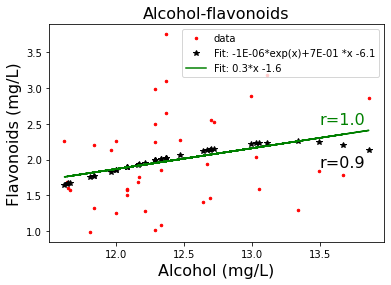

[-1.09282171e-06  6.73879041e-01 -6.05689452e+00]
[ 0.2898341  -1.60953309]


In [ ]:
#Fitting a function to data and plot 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#1. define a function to fit to the data
def expo_func(x, a, b, c):
    return a * np.exp(x) + b * x + c

def linear_func(x, a, b):
    return a * x + b 

x = np.array(alcohol[60:100])
y = np.array(flavonoids[60:100])

#2.fit function:
popt, pcov = curve_fit(expo_func, x, y)
r, p = stats.pearsonr(x,  expo_func(x, *popt))

popt2, pcov2 = curve_fit(linear_func, x, y)
r2, p2 = stats.pearsonr(x,  linear_func(x, *popt2))

#3. plot data
plt.plot(x,y,'.', ms='5', c='r', label='data')
plt.plot(x, expo_func(x, *popt), 'k*', label='Fit: %.E*exp(x)+%.E *x %.1f' % tuple(popt)) 
plt.text(13.5, 1.9, 'r=%.1f'%r, fontsize=16)

plt.plot(x, linear_func(x, *popt2), 'g-', label='Fit: %.1f*x %.1f ' % tuple(popt2)) 
plt.text(13.5, 2.5, 'r=%.1f'%r2, c = 'g',  fontsize=16)

plt.title('Alcohol-flavonoids', fontsize=16)
plt.xlabel('Alcohol (mg/L)', fontsize=16)
plt.ylabel('Flavonoids (mg/L)', fontsize=16)
plt.legend(loc = 'upper right')
plt.show()
print(popt)
print(popt2)

---
4.4. Ploting images
---

Using ***matplotlib.image*** 

https://matplotlib.org/stable/api/image_api.html?highlight=image#module-matplotlib.image

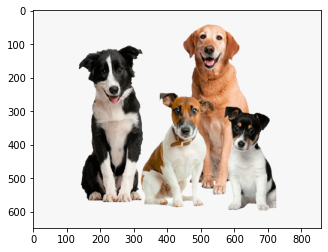

In [365]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('dogs.png')
imgplot = plt.imshow(img)

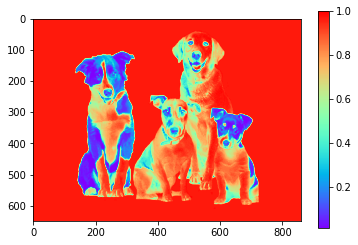

In [366]:
#Enhancing contrast by choosing one channel R, G, B
img2 = img[:, :, 0]
imgplot = plt.imshow(img2)
imgplot.set_cmap('rainbow')
plt.colorbar()
plt.imsave('dogs_in_color.png', img2)

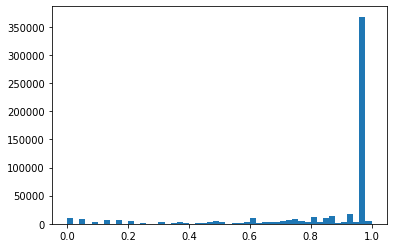

In [369]:
# histogram 
plt.hist(img2.flatten(), bins =50, range=(0,1))
plt.show()
